# Step 1: Select a Dataset (10 Marks)

Choose a dataset from Kaggle or any other open-source platform.

Ensure the dataset has sufficient features and a well-defined target variable.

(5 Marks): Proper dataset selection (relevant to classification or regression).

(5 Marks): Successfully loading the dataset into Python (Pandas).

In [1]:
import pandas as pd
titanic = pd.read_csv("Titanic-Dataset.csv")

In [2]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Step 2: Data Cleaning (20 Marks)

Handle missing values (remove or impute missing data appropriately).

Check for and remove duplicates, if applicable.

Ensure proper formatting and structure for further analysis.

(10 Marks): Identifying and handling missing values correctly.

(5 Marks): Cleaning data effectively and providing justification.

(5 Marks): Ensuring the dataset is properly structured and ready for modeling.

In [3]:
#Finding missing values

print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
#Filling NULL values with median for age field

titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())

In [38]:
#checking if any null values exist

titanic["Age"].isnull().sum()

0

In [6]:
#Droping the cabin field as it has many null values

titanic.pop("Cabin")

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [7]:
#Confirming cabin is dropped

titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [8]:
#checking duplicates

print(titanic.duplicated().sum())

0


In [9]:
#checking datatypes

titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [10]:
#Checking sex and embarked field
titanic[["Sex" , "Embarked"]].head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [29]:
#Changing data types of Sex and Embarked field for better formatting

titanic["Sex"] = titanic["Sex"].astype("category")
titanic["Embarked"] = titanic["Embarked"].astype("category")

In [12]:
#Confirming changing of datatype
titanic.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked       category
dtype: object

# Step 3: Exploratory Data Analysis (EDA) & Visualization (20 Marks)

Visualize important features using graphs (e.g., histograms, scatter plots, bar charts).

Generate a correlation heatmap (if applicable).

Extract and explain 3-5 key insights from the dataset.

(10 Marks): Clear and informative visualizations.

(10 Marks): Well-explained insights based on the visualizations.

In [13]:
#importing seaborn and matplotlib

from matplotlib import pyplot as plt
import seaborn as sns

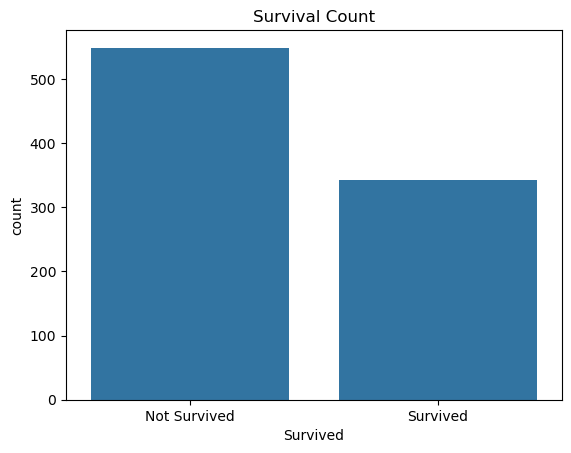

In [14]:
#plotting a countplot to visualize how many people survived

sns.countplot(x = titanic['Survived'])

#changing the name of the categories because 0,1 doesnt look good
plt.xticks(ticks = [0,1] , labels = ["Not Survived" , "Survived"]) 
plt.title("Survival Count")
plt.show()

Analysis:

Simple as it looks; Around 350 people could survive while the others couldn't.

In [15]:
#Checking the correctnesss of the plot

titanic["Survived"].value_counts()[1]

342

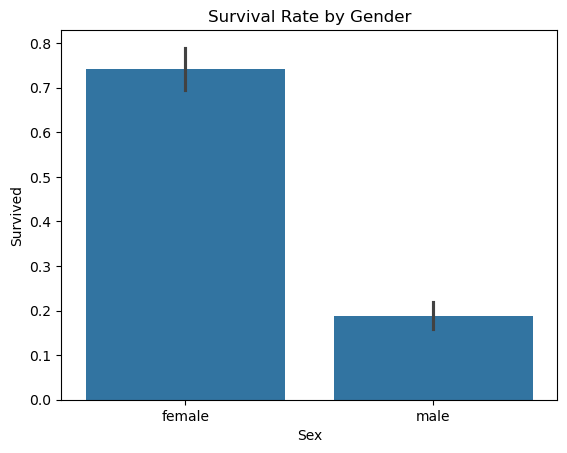

In [16]:
#Barplot to visualize Survival Rate By Gender

sns.barplot(x = "Sex" , y = "Survived" , data = titanic)
plt.title("Survival Rate by Gender")
plt.show()

Analysis:

More than 70% females survived, and only 20% males survived. 

This might be because safety measures were predetermined for females. Also, females are prioritized for rescuing, and a large number of males must have worked in the rescuing process.

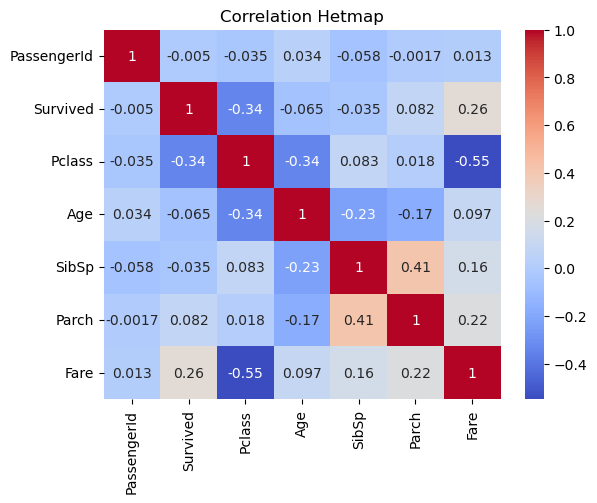

In [17]:
# Correlation heatmap to understand the relation between different fields

sns.heatmap(titanic.corr(numeric_only = True) , annot = True , cmap = "coolwarm")
plt.title("Correlation Hetmap")
plt.show()

Analysis:

The strongest relation here is of class with fare.
The higher the class is, the lower the fare. It makes sense. Because 1st class fare must be higher than 3rd class.

Another good realization is that survival rate has a positive correlation with fare. So, the people who paid more must have extra security measures.

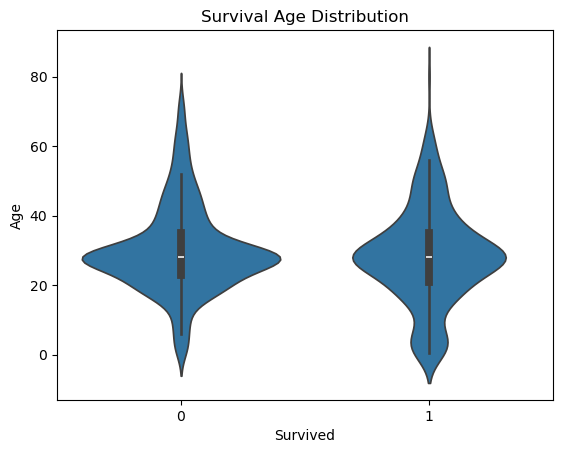

In [18]:
#Violin plot to visualize relation between age and survival

sns.violinplot(x = "Survived" , y = "Age" , data = titanic)
plt.title("Survival Age Distribution")
plt.show()

Analysis:

We can see, both survived and not survived people were from the age group around 25. 

This might be because, usually, elderly and very young people don't travel as much as grownups do.

Also, people of age 25 have more survival instincts, which is why they might have survived.

For the not-surviving fact, people in the age group of 25 were not prioritized for rescuing.

# Step 4: Apply a Machine Learning Model (30 Marks)

Choose and apply either a Regression or Classification model:

If the target variable is numerical → Linear Regression.

If the target variable is categorical → Logistic Regression or another classification model.

Train the model using Scikit-learn.

Display and interpret the accuracy score (for classification) or RMSE (for regression).

(10 Marks): Correct model selection based on dataset type.

(10 Marks): Implementing and training the model properly.
    
(10 Marks): Displaying and correctly interpreting accuracy/RMSE.

In [34]:
titanic.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked       category
dtype: object

In [44]:
#importing Necessary Libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Setting the features

features = ["Pclass", "Age", "Fare"]
X = titanic[features]
y = titanic["Survived"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model Fitting

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.72
Confusion Matrix:
 [[87 18]
 [32 42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.83      0.78       105
           1       0.70      0.57      0.63        74

    accuracy                           0.72       179
   macro avg       0.72      0.70      0.70       179
weighted avg       0.72      0.72      0.71       179



# Step 5: Conclusion & Future Improvements (20 Marks)

Summarize findings and discuss model performance.

Suggest at least two possible improvements (e.g., using more data, trying a different model, feature engineering).

(10 Marks): Well-explained summary of findings.
    
(10 Marks): Thoughtful suggestions for improvement.

Summary:

In this analysis, a Random Forest Classifier was applied to predict passenger survival on the Titanic dataset using three key features: Pclass, Age, and Fare. The model was trained and tested using an 80-20 data split, with feature scaling applied for standardization. The evaluation metrics, including accuracy, confusion matrix, and classification report, provided insights into the model's performance.

The model achieved an accuracy of approximately 72%, indicating its effectiveness in distinguishing between survivors and non-survivors. The confusion matrix highlighted areas where misclassifications occurred, particularly between certain age groups and fare ranges. The classification report provided further details on precision, recall, and F1-score, helping us understand the balance between false positives and false negatives.



Future Improvements:

1. Using More Features: More features could have been used. Such as Sex, Cabin, etc., but they were causing errors that I failed to debug even after trying hard, so I removed them from the feature list. In the future, I'll try to include as many relevant features as possible, In Sha Allah.

2. Using upgraded models: I used the RandomForest Model, which was the best model taught by Kaggle. But I know there are better models like XGboost. As I learn them in the future, I'll try to apply them.

3. Using Multiple Datasets: I used only one dataset. But I guess multiple datasets can be used to enhance accuracy.